# Car Pricing Model Project

    INFORMATION ABOUT PROJECT GOES HERE sdfsdf


# Imports

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Loading Data

In [75]:
car_df=pd.read_csv('/Users/davidshi/Downloads/CarPrice_Assignment.csv')

# General Understanding of DataFrame

In [76]:
car_df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
car_df.shape

(205, 26)

In [78]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Dataframe Cleanup

In [80]:
car_df=car_df.set_index('car_ID')

Extracting rows with any null values into seperate DataFrame

In [81]:
pd.isnull(car_df)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
dfnull=car_df[pd.isnull(car_df).any(axis=1)]

In [83]:
dfnull

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,


Seems like no row have any null value since the null dataframe returned empty

In [84]:
car_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [85]:
tempname=pd.DataFrame(car_df.CarName.str.split(' ',1).tolist(),columns = ['brand','model'],index=car_df.index)

In [86]:
tempname.head()

,brand,model
car_ID,,
1,alfa-romero,giulia
2,alfa-romero,stelvio
3,alfa-romero,Quadrifoglio
4,audi,100 ls
5,audi,100ls


*NOTE CAR [MODEL] DATA SAVED IN TEMPNAME DATAFRAME FOR FUTURE USAGE

In [87]:
car_df['CarName']=tempname['brand']

In [88]:
car_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [89]:
car_df['CarName'] = car_df['CarName'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche',
                                               'toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})

# Data Visualization

[Text(0, 0, 'alfa-romero'),
 Text(0, 0, 'audi'),
 Text(0, 0, 'bmw'),
 Text(0, 0, 'chevrolet'),
 Text(0, 0, 'dodge'),
 Text(0, 0, 'honda'),
 Text(0, 0, 'isuzu'),
 Text(0, 0, 'jaguar'),
 Text(0, 0, 'mazda'),
 Text(0, 0, 'buick'),
 Text(0, 0, 'mercury'),
 Text(0, 0, 'mitsubishi'),
 Text(0, 0, 'nissan'),
 Text(0, 0, 'peugeot'),
 Text(0, 0, 'plymouth'),
 Text(0, 0, 'porsche'),
 Text(0, 0, 'renault'),
 Text(0, 0, 'saab'),
 Text(0, 0, 'subaru'),
 Text(0, 0, 'toyota'),
 Text(0, 0, 'volkswagen'),
 Text(0, 0, 'volvo')]

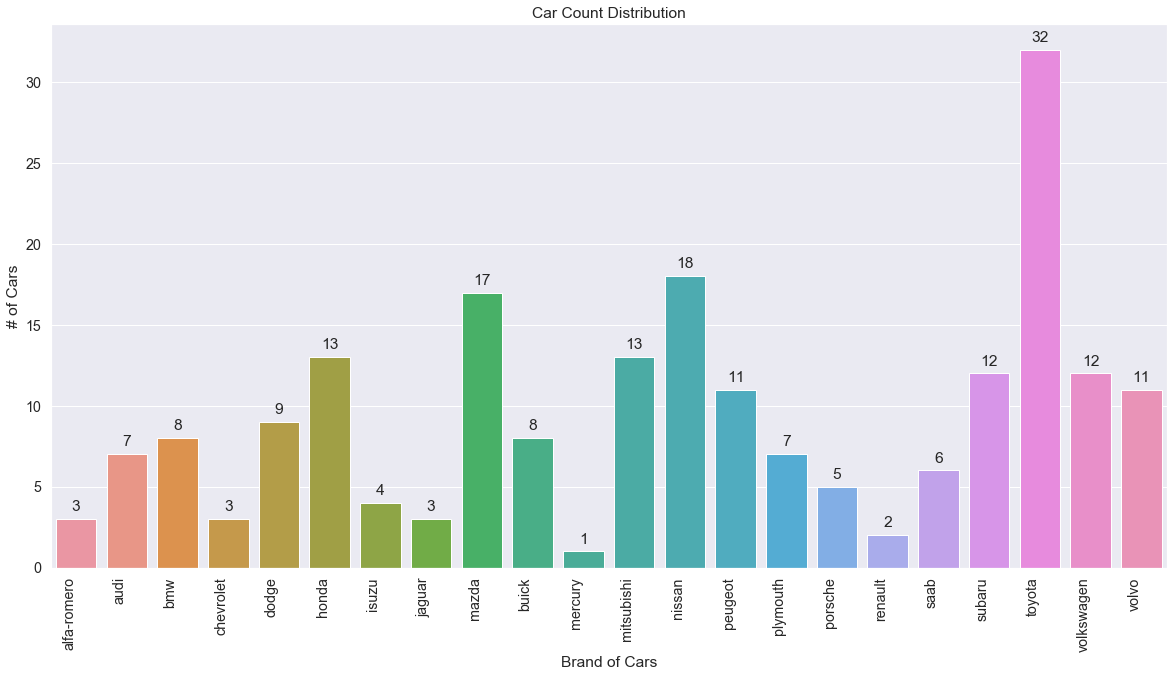

In [90]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.3)
ax=sns.countplot(x='CarName',data=car_df)
ax.title.set_text('Car Count Distribution')
plt.xlabel("Brand of Cars")
plt.ylabel("# of Cars")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,height ,ha="center")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

Toyota is the most popular car. Japanese make cars is defintely more popular then other makes due to low maintance cost. I drive a toyota myself! 

Text(0, 0.5, 'Number of Cars')

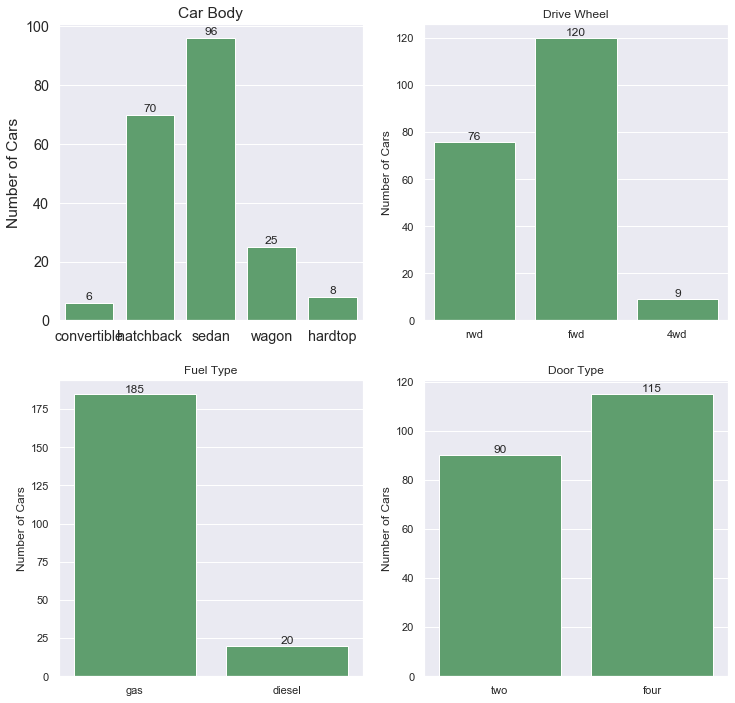

In [91]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.set(font_scale=1)
ax=sns.countplot(x='carbody',data=car_df,color='g')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
ax.title.set_text('Car Body')
plt.xlabel("")
plt.ylabel("Number of Cars")

plt.subplot(2,2,2)
ax=sns.countplot(x='drivewheel',data=car_df,color='g')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
ax.title.set_text('Drive Wheel')
plt.xlabel("")
plt.ylabel("Number of Cars")

plt.subplot(2,2,3)
ax=sns.countplot(x='fueltype',data=car_df,color='g')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
ax.title.set_text('Fuel Type')
plt.xlabel("")
plt.ylabel("Number of Cars")

plt.subplot(2,2,4)
ax=sns.countplot(x='doornumber',data=car_df,color='g')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1,height ,ha="center")
ax.title.set_text('Door Type')
plt.xlabel("")
plt.ylabel("Number of Cars")

Typical car attributes
    - Sedan
    - four wheel drive
    - fuel is gas
    - four doors
    
Let's try a matrix scatter plot to seem relationships between variables listed below
    - car length
    - car width
    - car height
    - curb weight
    - engine size
    - horsepower
    - citympg
    - highwaympg
    - price

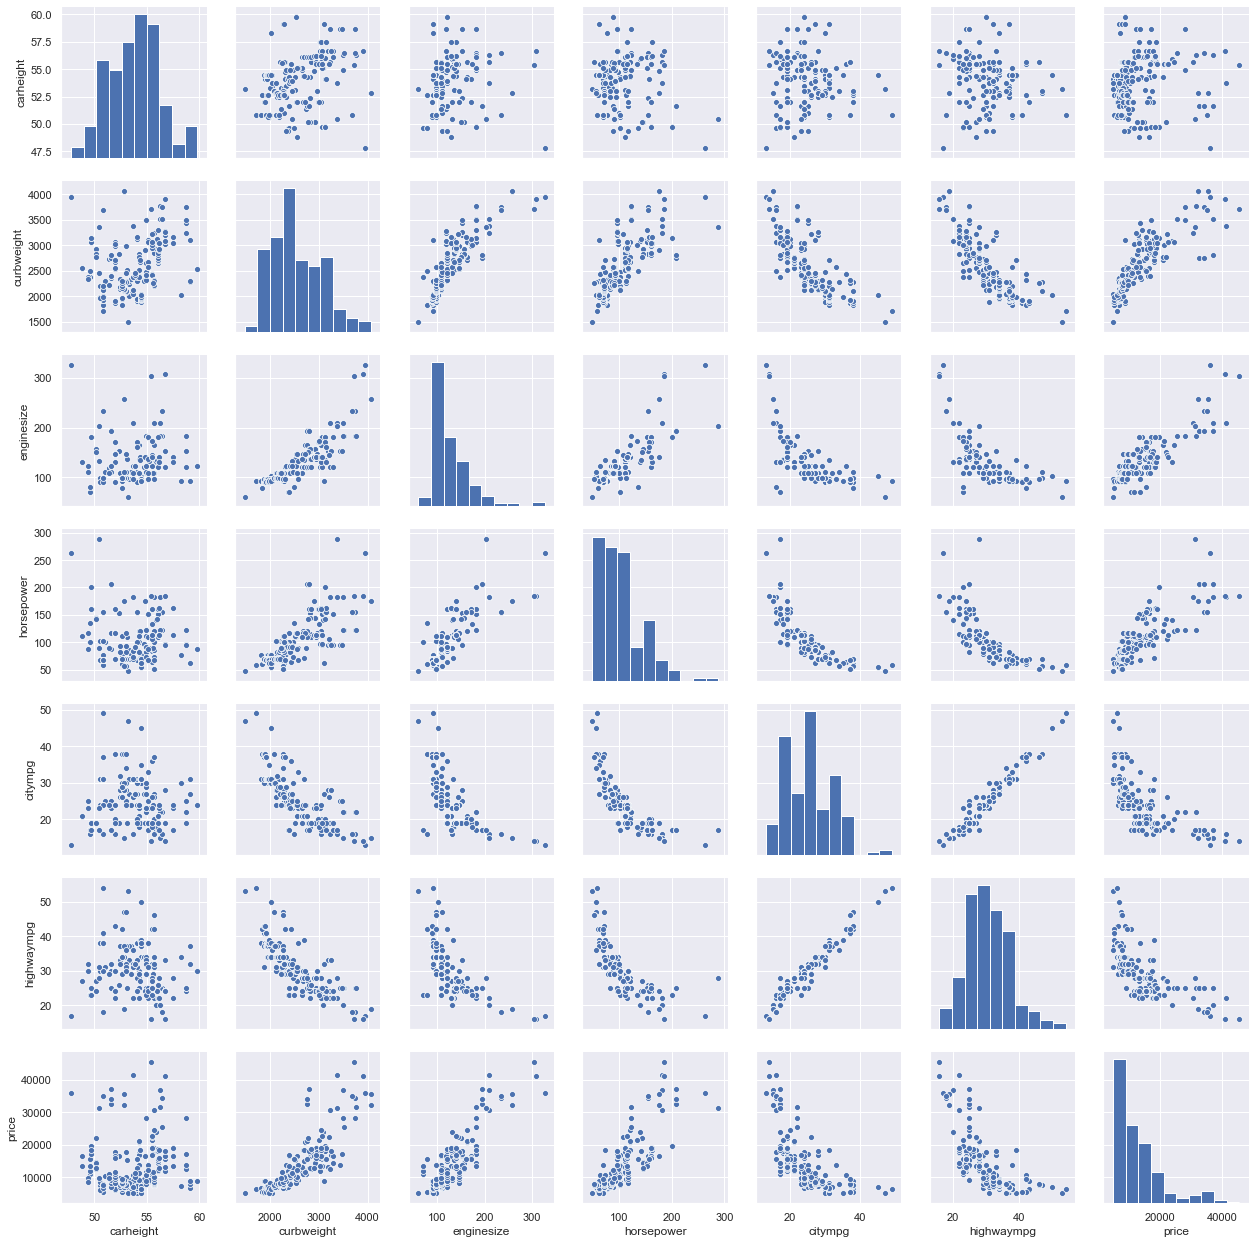

In [92]:
ax=sns.pairplot(car_df,vars=['carheight','curbweight','enginesize','horsepower','citympg','highwaympg','price'])

[Text(0, 0.5, ''), Text(0.5, 0, '')]

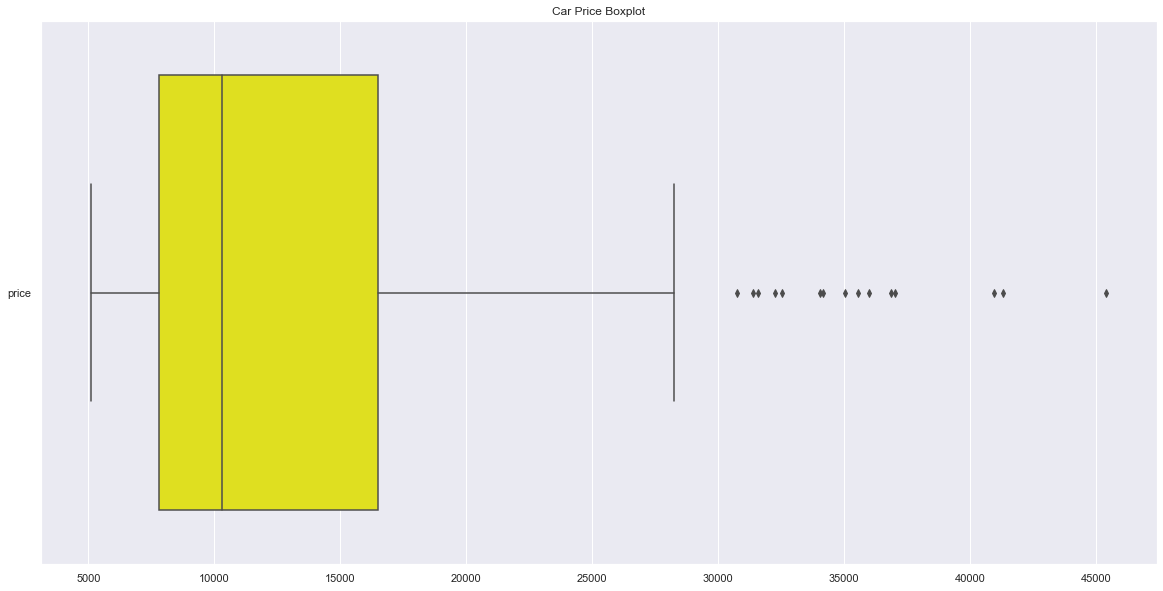

In [93]:
plt.figure(figsize=(20,10))
ax=sns.boxplot(data=car_df[['price']],orient="h", color='yellow')
ax.title.set_text('Car Price Boxplot')
ax.set(xlabel='',ylabel='')

Some cars in the price range of 30000+ is considered outliers

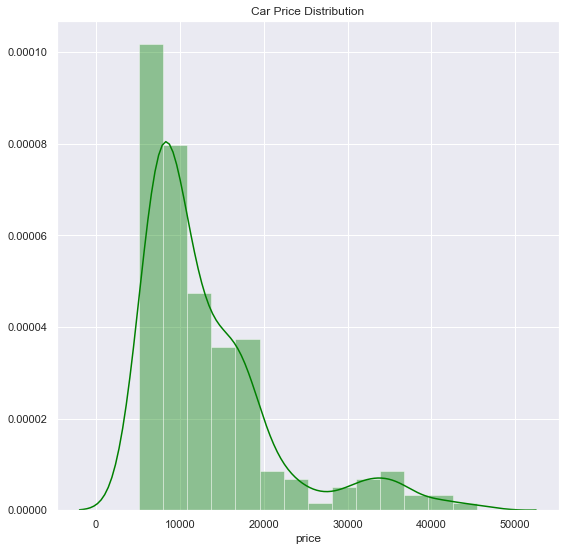

In [94]:
plt.figure(figsize=(9,9))
plt.title('Car Price Distribution')
sns.distplot(car_df['price'],color='green')

Price of most cars is less then 20000, plot is right skewed

Text(0.5, 1.0, 'Car Averge Price by Make')

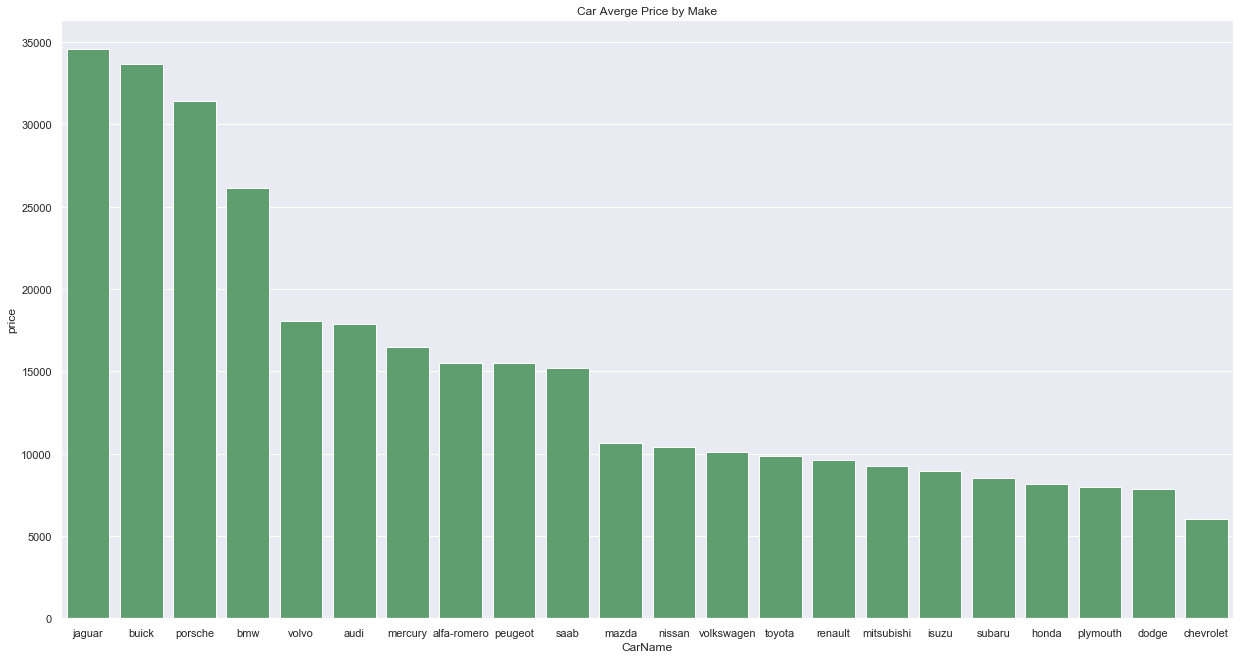

In [95]:
avgprice=car_df.groupby('CarName')['price'].mean().sort_values(ascending=False)
avgprice=avgprice.reset_index()
plt.figure(figsize=(21,11))
ax=sns.barplot(x='CarName',y='price',data=avgprice,color="g",order=avgprice['CarName'])
plt.title('Car Averge Price by Make')

Cars with high average prices are mainly European make, cars with low average prices are mainly Japanese make

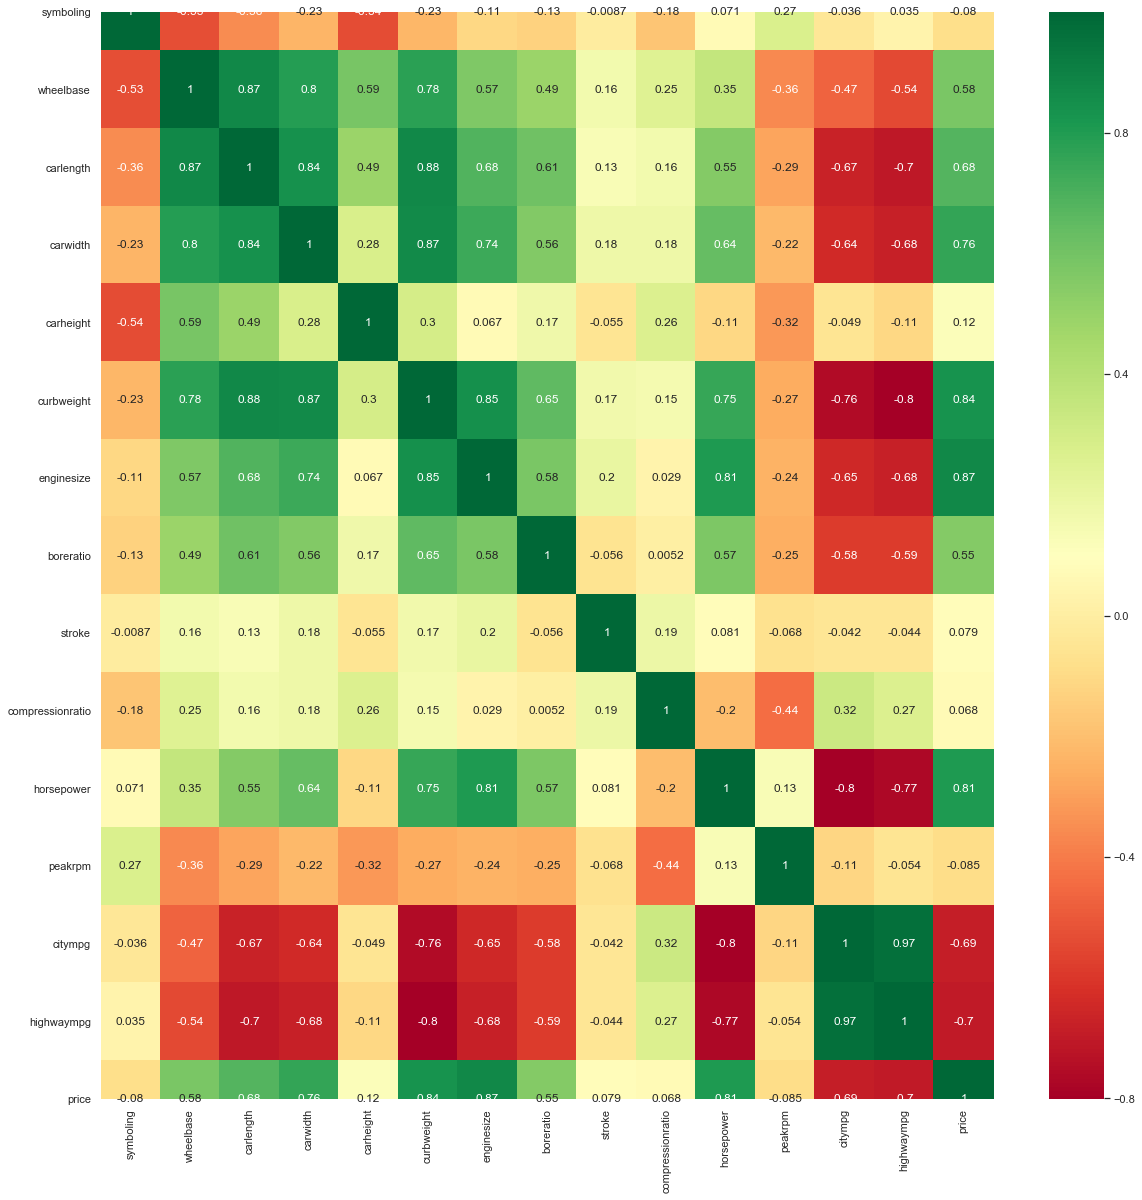

In [96]:
plt.figure(figsize = (20, 20))
sns.heatmap(car_df.corr(), cmap="RdYlGn",annot=True)



# Data Preperation for Model

In [97]:
car_train=car_df

Lets convert certain categorical elements to binary

In [98]:
car_train['fueltype'] = car_train['fueltype'].apply(lambda x : 1 if x=='gas' else 0)
car_train['aspiration'] = car_train['aspiration'].apply(lambda x : 1 if x=='std' else 0)
car_train['enginelocation'] = car_train['enginelocation'].apply(lambda x : 1 if x=='front' else 0)
car_train['doornumber'] = car_train['doornumber'].apply(lambda x : 2 if x=='four' else 1)

In [99]:
car_train=pd.get_dummies(car_train)

In [100]:
car_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,2,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
5,2,1,1,2,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [101]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 71 columns):
symboling                205 non-null int64
fueltype                 205 non-null int64
aspiration               205 non-null int64
doornumber               205 non-null int64
enginelocation           205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
CarName_alfa-romero      205 non-null uint8

# Rescaling elements

In Linear regression rescaling elements is appropriate so that variables have a comparable scale. It is hard to compare coefficients if this is not done because some may be very large and some may be very small. The price column needs to be scaled especially because it is a five digit element compared to city mpg which is a two digit element. Rescaling have no impact on model regression. The method used below is standarization (0-1).

In [102]:
ScalingVar=['wheelbase','carlength','carwidth', 'carheight',
            'curbweight','enginesize','boreratio','stroke','compressionratio',
            'horsepower','peakrpm','citympg','highwaympg','price']

In [103]:
scaler=MinMaxScaler()

In [104]:
car_train[ScalingVar]=scaler.fit_transform(car_train[ScalingVar])

In [105]:
car_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.819512,1.560976,0.985366,0.354419,0.491780,0.467317,0.493740,0.414106,...,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.297446,0.385535,0.497483,0.120377,0.175562,0.184139,0.178767,0.203627,0.201971,...,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,0.230321,0.376119,0.316667,0.350000,0.254849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,0.303207,0.479104,0.433333,0.525000,0.359193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,1.000000,0.460641,0.626866,0.550000,0.641667,0.561288,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building Model

Splitting data into train and test sets, 70% and 30% respectively 

Removing Car Name variables as I feel there is not much impact on this regression model.

In [137]:
carnameV=[]
for col in car_train.columns:
    if("CarName" in col):
        carnameV.append(col)

In [138]:
carnameV

[]

In [139]:
car_train=car_train.drop(carnameV,axis=1)

In [140]:
df_train,df_test=train_test_split(car_train, train_size=0.7, test_size=0.3, random_state=2)

In [141]:
df_train.shape

(143, 49)

In [142]:
df_test.shape

(62, 49)

In [175]:
ytest=df_test['price']

In [143]:
ytrain=df_train.pop('price')

In [144]:
xtrain=df_train

Let's start with a simple linear regression. I am using Recurrsive Feature Elimination (RFE) to choose the best regressors. This is done by removing the weakest feature in the linear model until desired number(12) of regressors is reached.

In [145]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
rfe=RFE(lm,12)
rfe=rfe.fit(xtrain,ytrain)

In [146]:
list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 31),
 ('fueltype', False, 8),
 ('aspiration', False, 14),
 ('doornumber', False, 25),
 ('enginelocation', True, 1),
 ('wheelbase', False, 16),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 17),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 7),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('citympg', False, 5),
 ('highwaympg', False, 3),
 ('carbody_convertible', False, 11),
 ('carbody_hardtop', False, 26),
 ('carbody_hatchback', False, 27),
 ('carbody_sedan', False, 30),
 ('carbody_wagon', False, 35),
 ('drivewheel_4wd', False, 32),
 ('drivewheel_fwd', False, 29),
 ('drivewheel_rwd', False, 33),
 ('enginetype_dohc', False, 19),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 18),
 ('enginetype_ohc', False, 9),
 ('enginetype_ohcf', False, 24),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('

The variables listed as true will be used in our regeression model. The number ranking shows the top 12.

In [147]:
rfecol=xtrain.columns[rfe.support_]
rfe=xtrain[rfecol]
rfelm1=sm.add_constant(rfe)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [148]:
rfelm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 79 to 169
Data columns (total 13 columns):
const                    143 non-null float64
enginelocation           143 non-null int64
carwidth                 143 non-null float64
curbweight               143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
horsepower               143 non-null float64
enginetype_dohcv         143 non-null uint8
enginetype_ohcv          143 non-null uint8
enginetype_rotor         143 non-null uint8
cylindernumber_eight     143 non-null uint8
cylindernumber_twelve    143 non-null uint8
dtypes: float64(7), int64(1), uint8(5)
memory usage: 10.8 KB


First Model using ordinary least squares method with constant added

In [149]:
lm1=sm.OLS(ytrain,rfelm1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     158.2
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           2.39e-71
Time:                        01:18:07   Log-Likelihood:                 217.63
No. Observations:                 143   AIC:                            -409.3
Df Residuals:                     130   BIC:                            -370.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2633      0.053      4.997      0.000       0.159       0.368
enginelocation           -0.1761      0.050     -3.519      0.001      -0.275      -0.077
carwidth                  0.3050      0.057      5.397      0.000       0.193       0.417
curbweight                0.1500      0.069      2.187      0.031       0.014       0.286
enginesize                1.0391      0.112      9.264      0.000       0.817       1.261
boreratio                -0.3340      0.044     -7.568      0.000      -0.421      -0.247
stroke                   -0.3769      0.049     -7.695      0.000      -0.474      -0.280
horsepower                0.2901      0.061      4.758      0.000       0.169       0.411
enginetype_dohcv         -0.2726      0.083     -3.270      0.001      -0.438      -0.108
enginetype_ohcv          -0.2525      0.029     -8.789      0.000      -0.309      -0.196
enginetype_rotor          0.1873      0.038      4.892      0.000       0.112       0.263
cylindernumber_eight      0.0973      0.051      1.906      0.059      -0.004       0.198
cylindernumber_twelve    -0.4085      0.080     -5.091      0.000      -0.567      -0.250
==============================================================================
Omnibus:                       30.387   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.599
Skew:                           0.430   Prob(JB):                     2.04e-43
Kurtosis:                       8.679   Cond. No.                         56.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r-squared and adjusted r-squared is very good.

Lets use Variance Inflation Factor(VIF) to show much variables correlate with each other, there might be strong multicollinearity

In [150]:
def vif_func(data):
    vifdf=pd.DataFrame(columns=['X_Variable','Vif'])
    vifdf['X_Variable']=data.columns
    vifdf['Vif']=[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    vifdf['Vif']=round(vifdf['Vif'],2)
    vifdf = vifdf.sort_values(by = "Vif", ascending = False)
    return vifdf
    

In [151]:
vif_func(rfelm1)

,X_Variable,Vif
0,const,129.37
4,enginesize,15.87
3,curbweight,9.32
7,horsepower,5.09
2,carwidth,5.06
11,cylindernumber_eight,3.30
5,boreratio,3.26
9,enginetype_ohcv,2.50
8,enginetype_dohcv,2.25
12,cylindernumber_twelve,2.08


enginesize and curbweight have very large VIF. This shows those two variables are multicollinear with other variables. 

Model 2: Removing enginesize and curbweight from model due to high VIF values.

In [152]:
rfe2=rfe
variabledrop1=['enginesize','curbweight']
rfe2=rfe2.drop(variabledrop,axis=1)

In [153]:
rfelm2=sm.add_constant(rfe2)

In [162]:
lm2=sm.OLS(ytrain,rfelm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     87.89
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           2.35e-53
Time:                        01:19:50   Log-Likelihood:                 166.73
No. Observations:                 143   AIC:                            -311.5
Df Residuals:                     132   BIC:                            -278.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1964      0.072      2.731      0.007       0.054       0.339
enginelocation           -0.3218      0.066     -4.888      0.000      -0.452      -0.192
carwidth                  0.5643      0.061      9.273      0.000       0.444       0.685
boreratio                -0.0767      0.054     -1.427      0.156      -0.183       0.030
stroke                   -0.0775      0.057     -1.347      0.180      -0.191       0.036
horsepower                0.6268      0.076      8.252      0.000       0.477       0.777
enginetype_dohcv         -0.6736      0.108     -6.266      0.000      -0.886      -0.461
enginetype_ohcv          -0.1174      0.037     -3.201      0.002      -0.190      -0.045
enginetype_rotor         -0.0186      0.046     -0.403      0.687      -0.110       0.073
cylindernumber_eight      0.3755      0.058      6.510      0.000       0.261       0.490
cylindernumber_twelve     0.0464      0.092      0.505      0.614      -0.135       0.228
==============================================================================
Omnibus:                       64.462   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.429
Skew:                           1.584   Prob(JB):                     2.34e-63
Kurtosis:                       9.195   Cond. No.                         33.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
vif_func(rfelm2)

,X_Variable,Vif
0,const,120.10
5,horsepower,3.93
2,carwidth,2.93
3,boreratio,2.41
9,cylindernumber_eight,2.10
7,enginetype_ohcv,2.03
6,enginetype_dohcv,1.86
1,enginelocation,1.39
10,cylindernumber_twelve,1.36
4,stroke,1.35




Some features have a p-value over 0.05 making them insignificant

Model 3: 

         Removing same features that were removed in model 2

         Removing boreratio (p-value: 0.156)
         
         Removing stroke (p-value: 1.8)
         
         Removing enginetype_rotor (p-value: 0.687)
         
         Removing cylindernumber_twelve (p-value: 0.614)

In [156]:
rfe3=rfe
variabledrop2=['enginesize','curbweight','boreratio','stroke','enginetype_rotor','cylindernumber_twelve']
rfe3=rfe3.drop(variabledrop2,axis=1)
rfelm3=sm.add_constant(rfe3)

In [161]:
lm3=sm.OLS(ytrain,rfelm3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 04 Mar 2020   Prob (F-statistic):           1.07e-56
Time:                        01:19:40   Log-Likelihood:                 164.57
No. Observations:                 143   AIC:                            -315.1
Df Residuals:                     136   BIC:                            -294.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1403      0.066      2.141      0.034       0.011       0.270
enginelocation          -0.3243      0.065     -5.014      0.000      -0.452      -0.196
carwidth                 0.5119      0.053      9.692      0.000       0.407       0.616
horsepower               0.5969      0.067      8.932      0.000       0.465       0.729
enginetype_dohcv        -0.6403      0.106     -6.052      0.000      -0.849      -0.431
enginetype_ohcv         -0.0939      0.035     -2.708      0.008      -0.163      -0.025
cylindernumber_eight     0.3679      0.056      6.529      0.000       0.256       0.479
==============================================================================
Omnibus:                       59.905   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.182
Skew:                           1.483   Prob(JB):                     1.28e-54
Kurtosis:                       8.732   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
vif_func(rfelm3)

,X_Variable,Vif
0,const,99.74
3,horsepower,3.04
2,carwidth,2.20
6,cylindernumber_eight,2.00
5,enginetype_ohcv,1.82
4,enginetype_dohcv,1.80
1,enginelocation,1.34


Regression Model 3

price=0.1403 - 0.3243enginelocation + 0.5119carwidth + 0.5969horsepower - 0.6403enginetype_dohcv - 0.0939enginetype_ohcv + 0.3679cylindernumber_eight



# Analysis

Calculating training and test MSE to make sure we are not overfitting or underfitting

Using model to predict on test data

Quantify model by calculating R squared value of Actual vs Predicted


In [169]:
ytrainpredictlm2=lm2.predict(rfelm2)
trainingMSElm2=mean_squared_error(ytrain,ytrainpredictlm2)
trainingMSElm2

0.005685555216265573

Text(0, 0.5, 'Predicted')

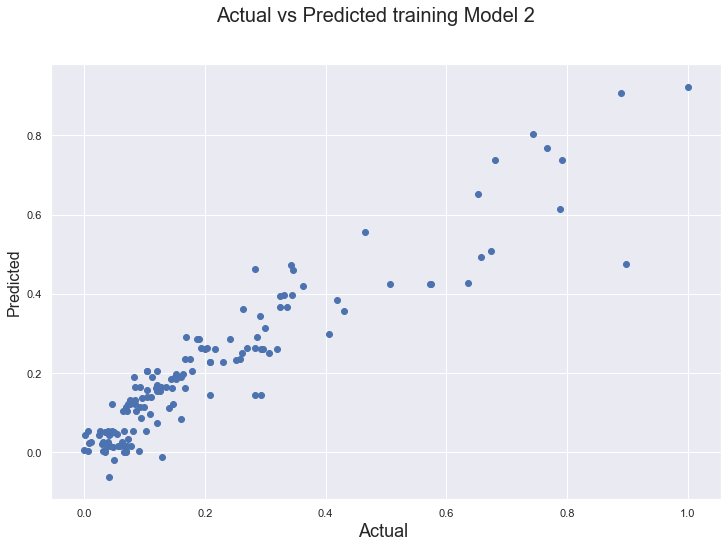

In [172]:
ax = plt.figure(figsize=(12,8))
plt.scatter(ytrain,ytrainpredictlm2)
ax.suptitle('Actual vs Predicted training Model 2', fontsize=20)   
plt.xlabel('Actual ', fontsize=18)                   
plt.ylabel('Predicted', fontsize=16)

In [174]:
r2_score(ytrain,ytrainpredictlm2)

0.8694226484846599

In [180]:
testlm2=sm.add_constant(df_test)

In [182]:
testlm2=testlm2[rfelm2.columns]
ytestpredictlm2=lm2.predict(testlm2)
testMSElm2=mean_squared_error(ytest,ytestpredictlm2)
testMSElm2

0.008714486257610196

Text(0, 0.5, 'Predicted')

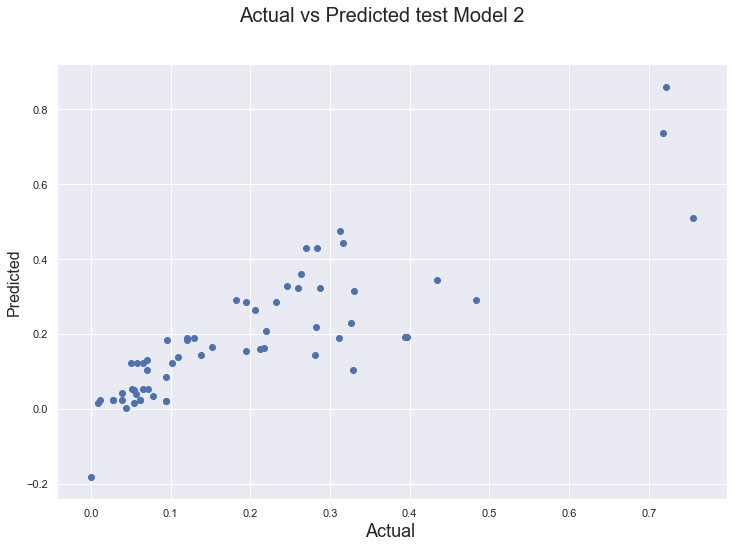

In [184]:
ax = plt.figure(figsize=(12,8))
plt.scatter(ytest,ytestpredictlm2)
ax.suptitle('Actual vs Predicted test Model 2', fontsize=20)   
plt.xlabel('Actual ', fontsize=18)                   
plt.ylabel('Predicted', fontsize=16)

In [185]:
r2_score(ytest,ytestpredictlm2)

0.6980937017092108

Rsquared value of prediction is 0.698

69.8% variance of data is explained by the model 2

In [186]:
ytrainpredictlm3=lm3.predict(rfelm3)
trainingMSElm3=mean_squared_error(ytrain,ytrainpredictlm3)
trainingMSElm3

0.005859983412310332

Text(0, 0.5, 'Predicted')

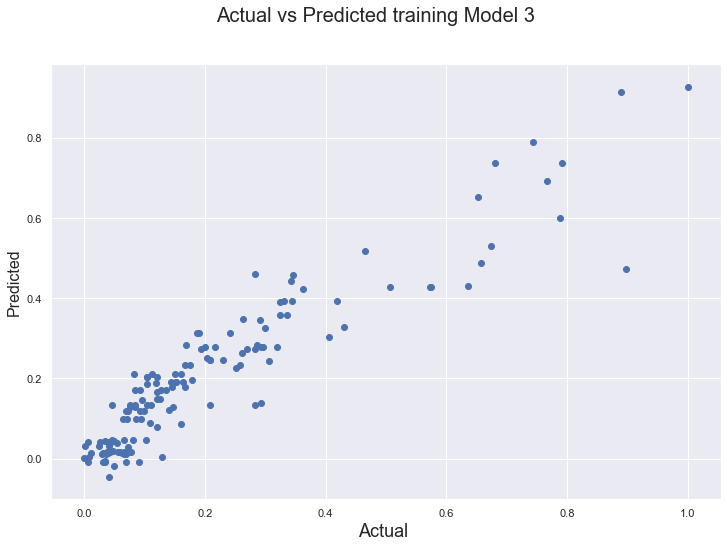

In [187]:
ax = plt.figure(figsize=(12,8))
plt.scatter(ytrain,ytrainpredictlm3)
ax.suptitle('Actual vs Predicted training Model 3', fontsize=20)   
plt.xlabel('Actual ', fontsize=18)                   
plt.ylabel('Predicted', fontsize=16)

In [188]:
r2_score(ytrain,ytrainpredictlm3)

0.8654166418586116

In [189]:
testlm3=sm.add_constant(df_test)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [191]:
testlm3=testlm3[rfelm3.columns]
ytestpredictlm3=lm3.predict(testlm3)
testMSElm3=mean_squared_error(ytest,ytestpredictlm3)
testMSElm3

0.00810539250326308

Text(0, 0.5, 'Predicted')

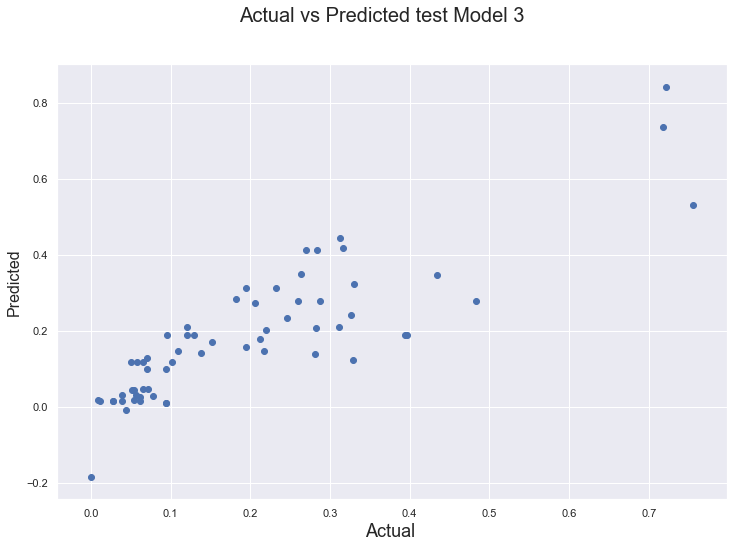

In [192]:
ax = plt.figure(figsize=(12,8))
plt.scatter(ytest,ytestpredictlm3)
ax.suptitle('Actual vs Predicted test Model 3', fontsize=20)   
plt.xlabel('Actual ', fontsize=18)                   
plt.ylabel('Predicted', fontsize=16)

In [193]:
r2_score(ytest,ytestpredictlm3)

0.7191952601087539

Rsquared value of prediction is 0.719

71.9% variance of data is explained by the model 3

# Conclusion